In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
# Summarize loaded dataset
print('Train: X=%s , y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s , y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28) , y=(60000,)
Test: X=(10000, 28, 28) , y=(10000,)


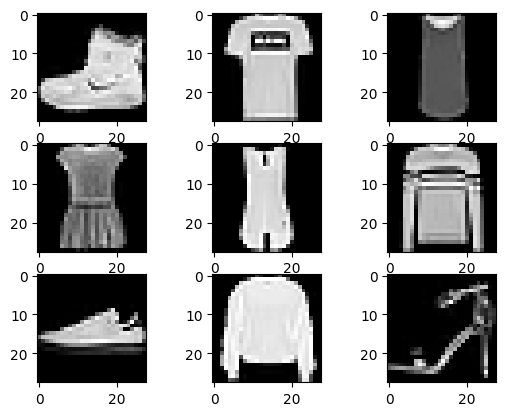

In [7]:
# plot first few images
import matplotlib.pyplot as plt

for i in range(9):
    # definen subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
# Preprocess the data
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7822 - loss: 0.6336
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8605 - loss: 0.3873
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8772 - loss: 0.3403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8836 - loss: 0.3150
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8909 - loss: 0.2930


In [20]:
# Evaluate the model 
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8725 - loss: 0.3570
Test accuracy: 0.8711000084877014


In [22]:
# Make predictions with the model
predictions = model.predict(X_test)

# Print shape of predictions array
print(predictions.shape)

# Print first 10 prediction
print(predictions[:10])

# Convert predictions to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# Print first 10 class labels
print(class_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[[3.93665641e-06 8.51226503e-08 1.23048380e-07 3.03678611e-08
  1.25739632e-06 3.74195212e-03 2.35004281e-05 9.45677906e-02
  2.64103164e-06 9.01658714e-01]
 [8.34528328e-06 3.69223124e-11 9.97390568e-01 9.26437771e-09
  8.45113886e-04 1.61497953e-12 1.75596133e-03 5.52303734e-14
  1.37904088e-08 3.94843223e-14]
 [1.50538657e-08 1.00000000e+00 6.04210224e-11 2.87047488e-08
  1.61237468e-09 6.54179766e-15 1.14721954e-10 2.34357059e-18
  3.85608323e-10 4.51232556e-16]
 [9.72192211e-08 9.99975324e-01 1.57027085e-08 2.43633931e-05
  2.51116603e-07 2.74859302e-12 1.58486113e-08 1.07403312e-15
  5.33223077e-10 2.22588267e-12]
 [2.46680215e-01 3.47970763e-06 7.01417401e-02 1.13049867e-02
  8.92581046e-03 1.92748790e-04 6.61006391e-01 1.87442711e-05
  1.70701591e-03 1.88779377e-05]
 [3.48394533e-05 9.99961853e-01 4.32304887e-07 5.60294609e-07
  4.25588013e-07 9.96274591e-12 1.77617255e-06 4.08673339e-14
  1.96176249e-08 6.66929359e-12]
 [3.1